In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
asim_results = pd.read_csv("outputs/final_longdist_tours.csv") # tours
asim_persons = pd.read_csv("outputs/final_persons.csv")
asim_hh = pd.read_csv("outputs/final_households.csv")
asim_results

,longdist_tour_id,person_id,tour_type,tour_type_count,tour_type_num,tour_num,tour_count,tour_category,number_of_participants,household_id,...,ldt_end_hour,internal_external,external_destchoice,external_tour_mode,travelers_occupation,ldt_tour_segment,internal_destination,destination_logsum,tour_mode,ldt_mode_choice_logsum
0,558199280,4014188,longdist_household,1,1,1,1,longdist,3,1726858,...,13,0,-1,-1,0,household_day,4963,4.829965,PRIVATEAUTO,-0.87420
1,1243917970,9251947,longdist_household,1,1,1,1,longdist,3,3837995,...,12,1,5089,DRIVE,8,household_overnight,-1,NaN,-1,NaN
2,1678800620,12346292,longdist_household,1,1,1,1,longdist,2,5184459,...,20,0,-1,-1,8,household_day,1602,6.763740,PRIVATEAUTO,-0.78090
3,1051629010,7599511,longdist_household,1,1,1,1,longdist,1,3252113,...,23,0,-1,-1,16,household_day,1671,5.931343,PRIVATEAUTO,-0.66890
4,1758304310,13126061,longdist_household,1,1,1,1,longdist,2,5423479,...,18,0,-1,-1,0,household_day,1417,7.917039,PRIVATEAUTO,-0.61975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37822,1829120112,13642741,longdist_person_OTHER,1,1,1,1,longdist,1,5642309,...,21,0,-1,-1,20,other_day_nonstudent,402,4.730420,PRIVATEAUTO,-0.62683
37823,1829169892,13643309,longdist_person_OTHER,1,1,1,1,longdist,1,5642456,...,-1,0,-1,-1,23,other_overnight_nonstudent,2426,6.413124,PRIVATEAUTO,-0.64998
37824,1829225552,13643955,longdist_person_OTHER,1,1,1,1,longdist,1,5642620,...,13,0,-1,-1,18,other_day_nonstudent,320,5.454127,PRIVATEAUTO,-0.61188
37825,1829226572,13643967,longdist_person_OTHER,1,1,1,1,longdist,1,5642623,...,13,0,-1,-1,14,other_day_student,241,6.728555,PRIVATEAUTO,-0.71838


In [4]:
old_results = pd.read_csv("outputs/zzLDTPersonTours.csv") # tours
old_persons = pd.read_csv("outputs/zzPersonData.csv")
old_hh = pd.read_csv("outputs/zzHouseholdData.csv")
old_results

,hhID,memberID,tourID,income,tourPurpose,tourMode,patternType,destinationType,home,destination,distance,outboundTravelTime,inboundTravelTime,departureTime,arrivalTime,durationTime,partySize,tripMode
0,36990,1,0,7100,OTHER,AIR,BEGIN_TOUR,EXTERNAL,1404,3814,105.02,0.00,0.00,700,-1,-1,1,AIR
1,37200,1,1,18100,OTHER,AUTO,COMPLETE_TOUR,INTERNAL,1334,4196,51.05,68.01,70.74,900,1800,540,1,SR2
2,38382,1,2,1800,OTHER,AUTO,COMPLETE_TOUR,INTERNAL,1446,1205,65.73,70.06,70.04,800,1200,240,1,SR3P
3,39144,1,3,11400,OTHER,AUTO,COMPLETE_TOUR,INTERNAL,3080,822,53.89,56.59,56.93,1600,2300,420,1,DA
4,39330,1,4,17000,OTHER,TRANSIT_WALK,BEGIN_TOUR,INTERNAL,2198,615,59.53,368.89,413.22,1400,-1,-1,1,TRANSIT_WALK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83537,5626035,1,172,104000,WORKRELATED,AUTO,COMPLETE_TOUR,INTERNAL,689,3137,57.23,65.93,64.08,1600,2000,240,1,DA
83538,5626035,2,173,104000,WORKRELATED,AUTO,COMPLETE_TOUR,INTERNAL,689,3142,58.83,64.55,62.80,1600,2000,240,1,DA
83539,5626110,1,174,102200,OTHER,AUTO,BEGIN_TOUR,INTERNAL,1135,603,155.06,150.07,148.57,1700,-1,-1,1,SR2
83540,5626110,2,175,102200,OTHER,AUTO,BEGIN_TOUR,INTERNAL,1135,593,159.64,153.97,153.69,1700,-1,-1,1,SR2


In [5]:
# household tour gen

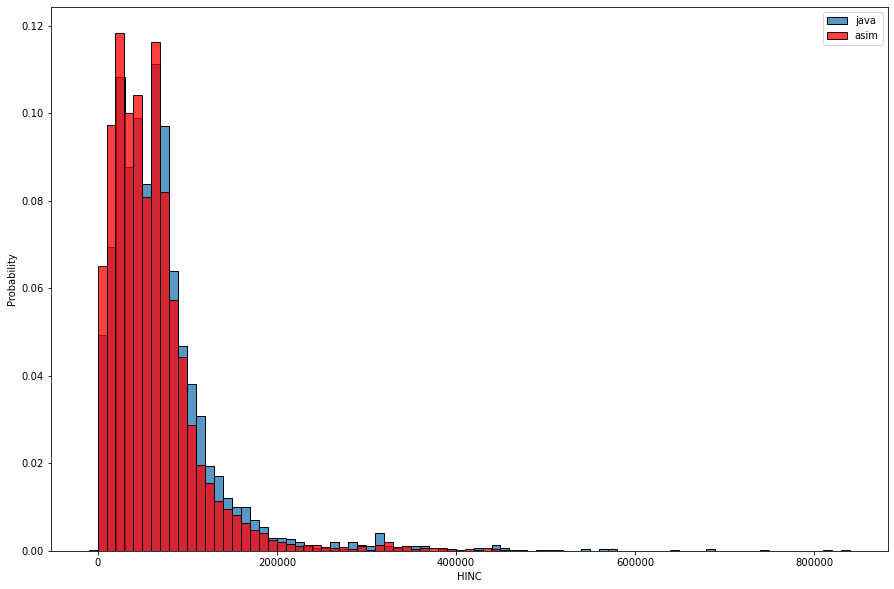

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh[old_hh.LD_HOUSEHOLD_TOUR == 1].HINC, ax=ax, label="java", stat="probability", binwidth=10000)
sns.histplot(asim_hh[asim_hh.ldt_tour_gen_household].INCOME, ax=ax, label="asim", stat="probability", color="red", binwidth=10000)
ax.legend()

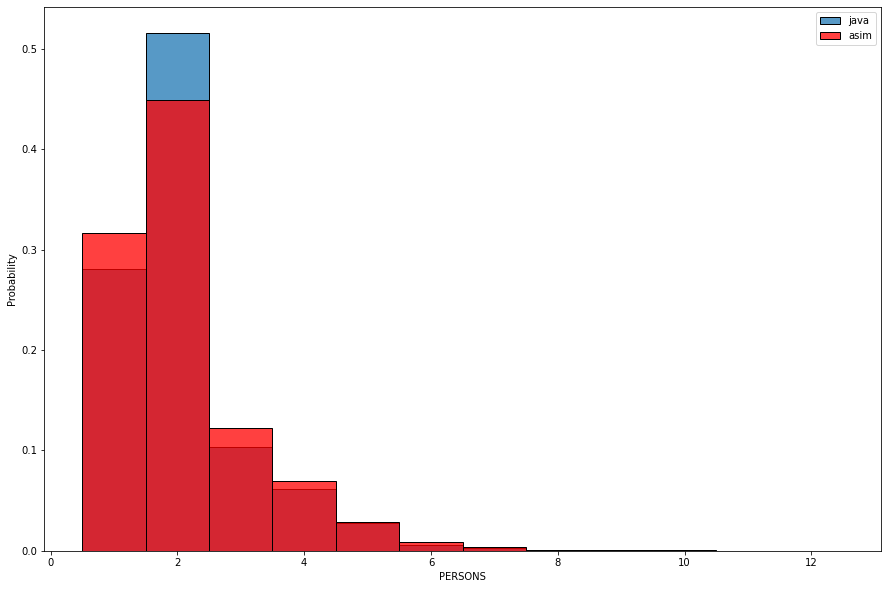

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh[old_hh.LD_HOUSEHOLD_TOUR == 1].PERSONS, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_hh[asim_hh.ldt_tour_gen_household].hhsize, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

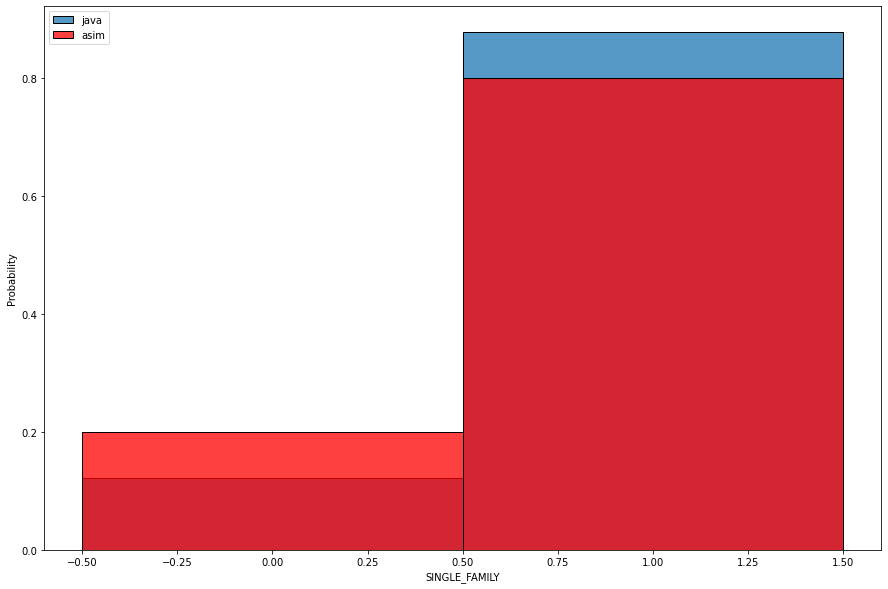

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh[old_hh.LD_HOUSEHOLD_TOUR == 1].SINGLE_FAMILY, ax=ax, label="java", discrete=True, stat="probability")
sns.histplot(asim_hh[asim_hh.ldt_tour_gen_household].BLD.isin([2, 3]).astype(int), ax=ax, label="asim", discrete=True, stat="probability", color="red")
ax.legend()

In [9]:
old_persons["working"] = old_persons["WORK_TAZ"] != 0

In [12]:
old_persons["working"] = old_persons["ESR"].isin([1, 2, 4, 5])

In [13]:
old_hh["workers"] = old_persons.groupby("HH_ID").working.sum().fillna(0)
old_hh["workers"] = old_hh["workers"].fillna(0)

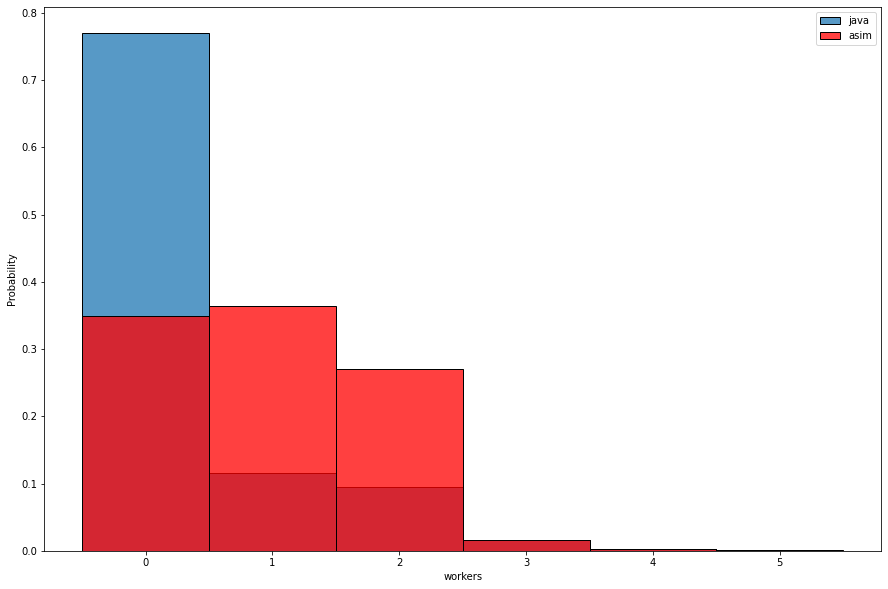

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh[old_hh.LD_HOUSEHOLD_TOUR == 1].workers, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_hh[asim_hh.ldt_tour_gen_household].num_workers, ax=ax, label="asim", stat="probability", discrete=True, color="red")
ax.legend()

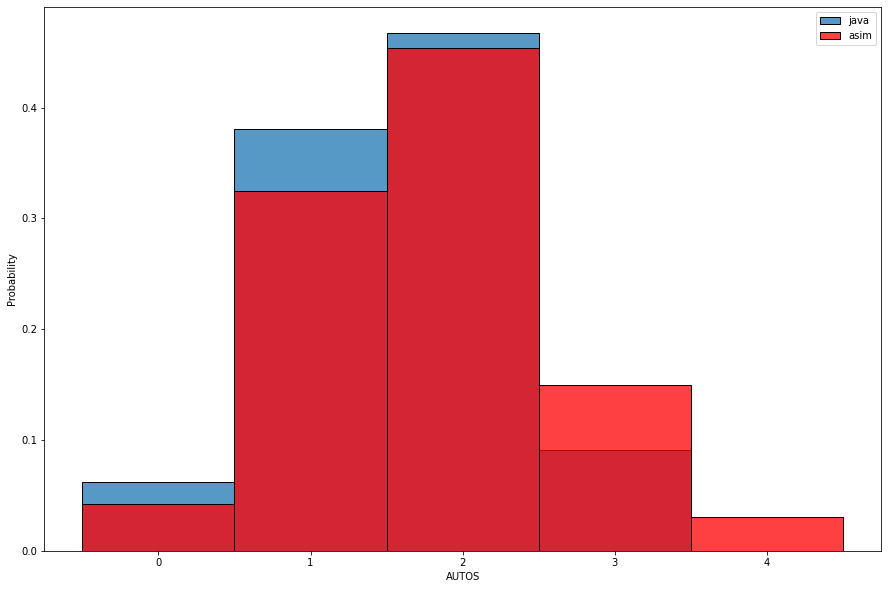

In [42]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh[old_hh.LD_HOUSEHOLD_TOUR == 1].AUTOS, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_hh[asim_hh.ldt_tour_gen_household].auto_ownership, ax=ax, label="asim", stat="probability", discrete=True, color="red")
ax.legend()

In [ ]:
# workrelated tour gen

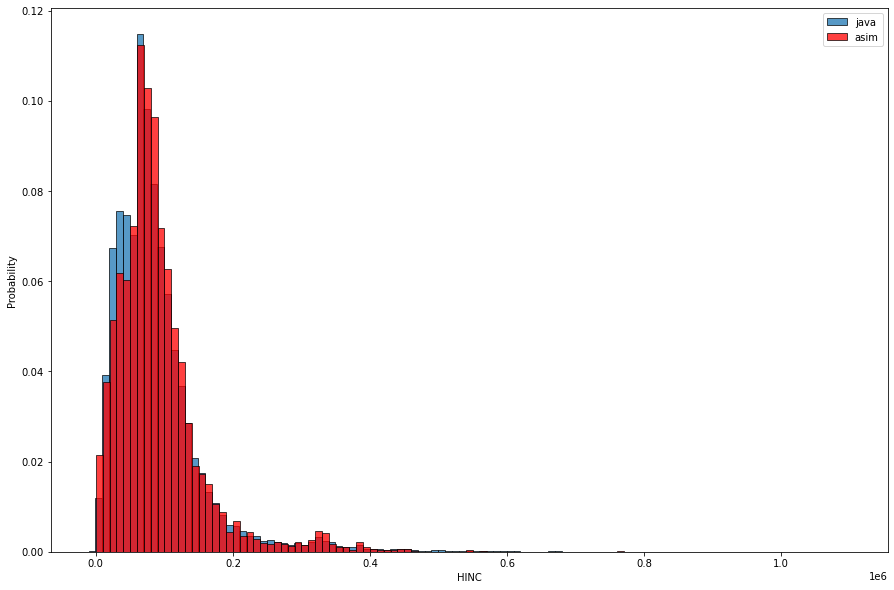

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_persons[old_persons.LD_INDICATOR_WORKRELATED == 1].HH_ID].HINC, ax=ax, label="java", stat="probability", binwidth=10000)
sns.histplot(asim_hh.set_index("household_id").loc[asim_persons[asim_persons.ldt_tour_gen_person_WORKRELATED].household_id].INCOME, ax=ax, label="asim", stat="probability", color="red", binwidth=10000)
ax.legend()

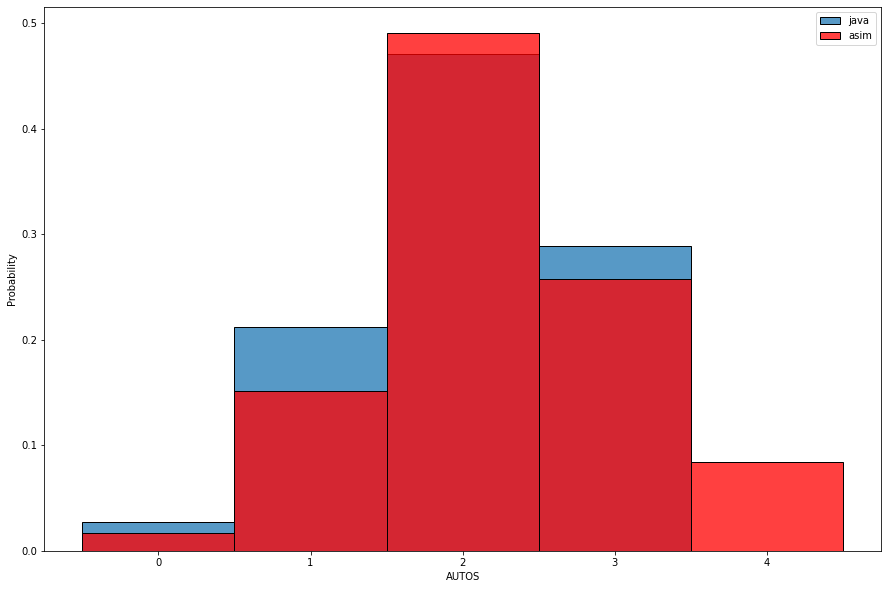

In [43]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_persons[old_persons.LD_INDICATOR_WORKRELATED == 1].HH_ID].AUTOS, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_hh.set_index("household_id").loc[asim_persons[asim_persons.ldt_tour_gen_person_WORKRELATED].household_id].auto_ownership, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

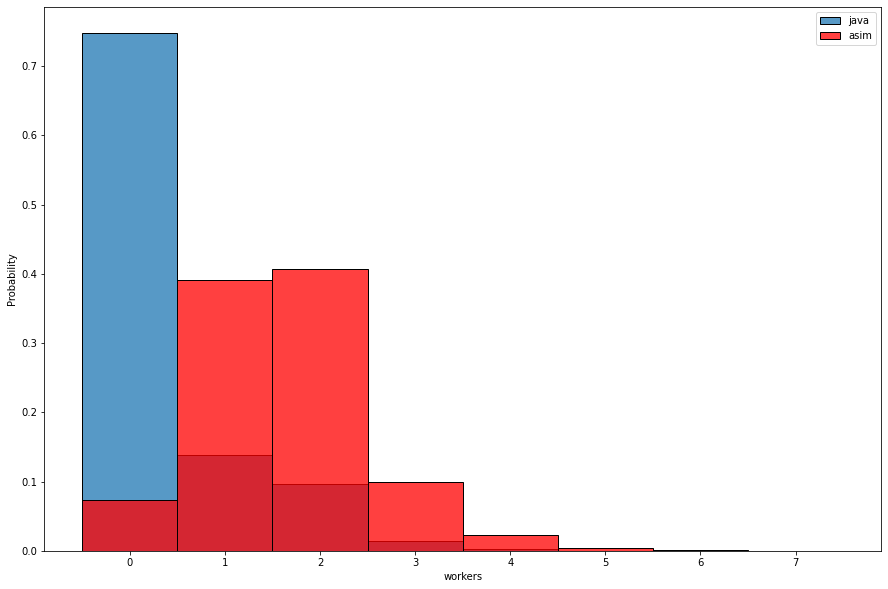

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_persons[old_persons.LD_INDICATOR_WORKRELATED == 1].HH_ID].workers, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_hh.set_index("household_id").loc[asim_persons[asim_persons.ldt_tour_gen_person_WORKRELATED].household_id].num_workers, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()
# try consistent unemp def (esr vs occup)

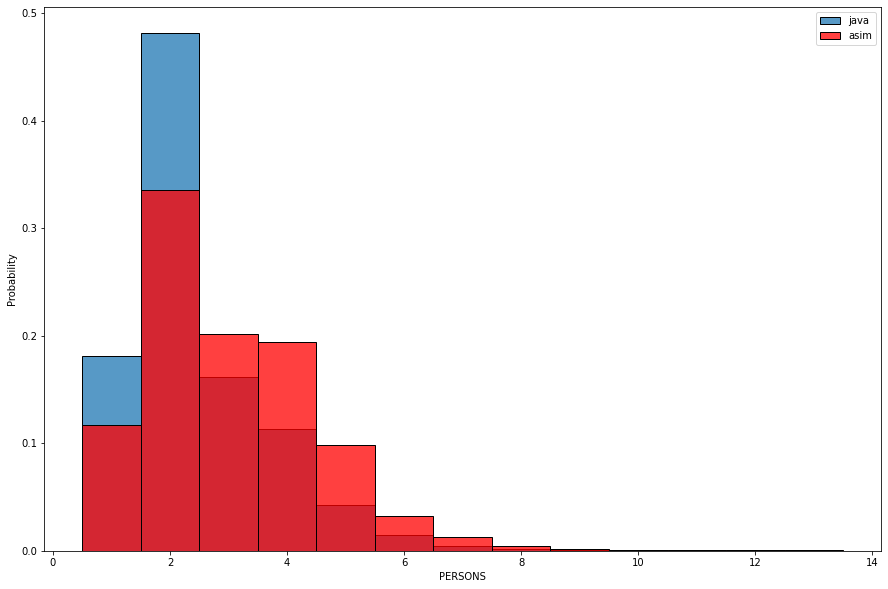

In [49]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_persons[old_persons.LD_INDICATOR_WORKRELATED == 1].HH_ID].PERSONS, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_hh.set_index("household_id").loc[asim_persons[asim_persons.ldt_tour_gen_person_WORKRELATED].household_id].hhsize, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

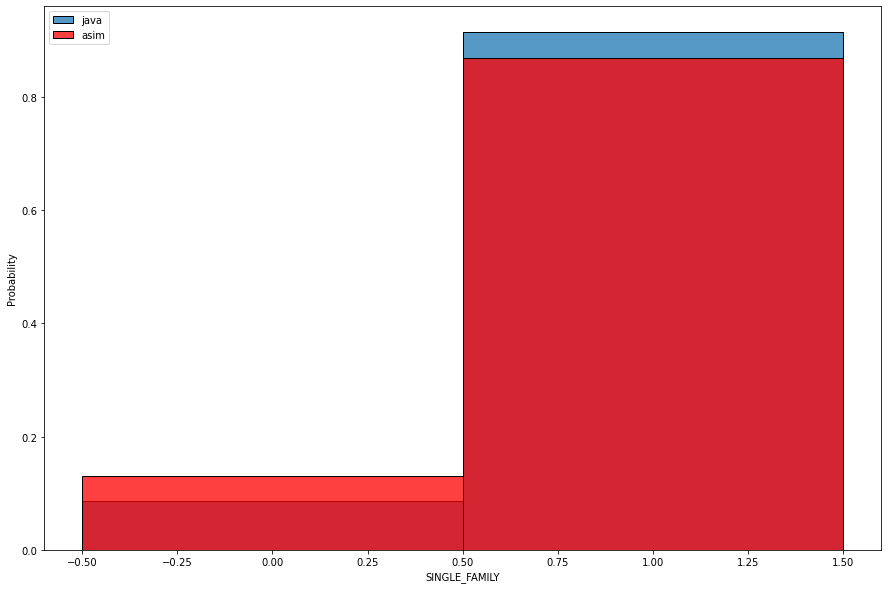

In [52]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_persons[old_persons.LD_INDICATOR_WORKRELATED == 1].HH_ID].SINGLE_FAMILY, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_hh.set_index("household_id").loc[asim_persons[asim_persons.ldt_tour_gen_person_WORKRELATED].household_id].BLD.isin([2, 3]).astype(int), ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

In [54]:
old_persons["SW_OCCUP"].value_counts()

No Occupation     1856946
Office             388900
Service            235540
Assembly           234385
Retail             216074
Manager            210239
Health             206254
Transport          190774
Professionals      184215
Food               166709
Construction       146821
Primary            121965
Non retail         105289
Business           103446
Maintenance         93359
Entertain           39504
Post secondary      23217
Agriculture         20898
Military             3206
Name: SW_OCCUP, dtype: int64

In [60]:
old_persons["occup"] = 0
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Manager", 1, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Business", 2, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Professionals", 3, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Post secondary", 4, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Primary", 5, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Entertain", 6, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Health", 7, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Service", 8, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Food", 9, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Retail", 10, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Non retail", 11, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Office", 12, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Agriculture", 13, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Construction", 14, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Maintenace", 15, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Assembly", 16, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Transport", 17, old_persons["occup"])
old_persons["occup"] = np.where(old_persons["SW_OCCUP"] == "Military", 18, old_persons["occup"])

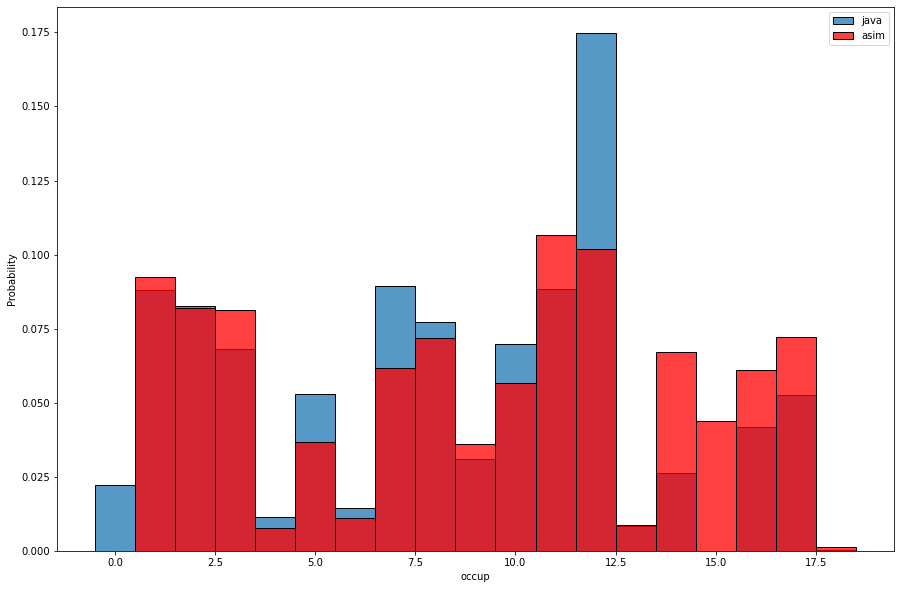

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_persons[old_persons.LD_INDICATOR_WORKRELATED == 1].occup, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_persons[asim_persons.ldt_tour_gen_person_WORKRELATED].SW_OCCUP, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

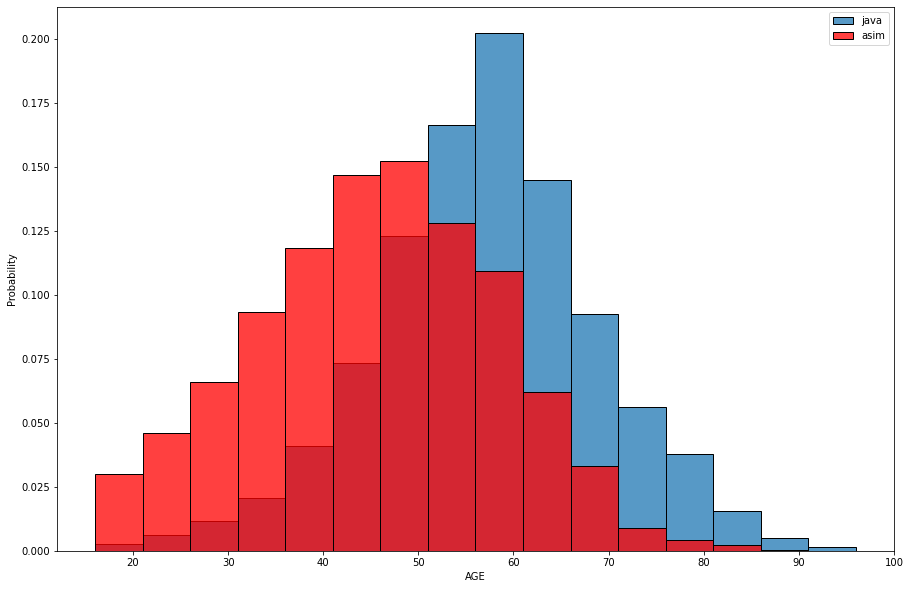

In [67]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_persons[old_persons.LD_INDICATOR_WORKRELATED == 1].AGE, ax=ax, label="java", stat="probability", binwidth = 5)
sns.histplot(asim_persons[asim_persons.ldt_tour_gen_person_WORKRELATED].age, ax=ax, label="asim", stat="probability", color="red", binwidth = 5)
ax.legend()

In [32]:
full_hh = pd.read_csv("../data_full/households.csv").set_index("household_id")

In [30]:
old_hh

,HH_ID,TAZ,PERSONS,SINGLE_FAMILY,AUTOS,HINC,LD_HOUSEHOLD_TOUR,LD_HOUSEHOLD_PATTERN,workers
0,36771,1093,1,0,0,12700,0,4,0.0
1,36774,2503,1,0,0,12600,0,4,0.0
2,36777,3650,1,0,0,7200,0,4,0.0
3,36780,4714,1,1,0,6000,0,4,0.0
4,36783,309,1,0,0,7600,0,4,0.0
...,...,...,...,...,...,...,...,...,...
1881045,5626131,614,1,1,1,269000,0,4,2.0
1881046,5626134,4376,2,1,2,179100,0,4,0.0
1881047,5626137,1380,2,1,2,121200,0,4,0.0
1881048,5626140,1785,1,1,1,131000,0,4,1.0


In [33]:
full_hh.loc[36771]

TAZ         1093
PERSONS        1
BLD            9
INCOME     12700
Name: 36771, dtype: int64

In [35]:
full_hh.loc[36774]

TAZ         2503
PERSONS        1
BLD            9
INCOME     12600
Name: 36774, dtype: int64

In [38]:
old_persons.columns

Index(['HH_ID', 'memberID', 'home_taz', 'SEX', 'AGE', 'ENROLL', 'ESR',
       'SW_SPLIT_IND', 'SW_OCCUP', 'WORK_TAZ', 'LD_INDICATOR_HOUSEHOLD',
       'LD_INDICATOR_WORKRELATED', 'LD_INDICATOR_OTHER',
       'LD_TOUR_PATTERN_HOUSEHOLD', 'LD_TOUR_PATTERN_WORKRELATED',
       'LD_TOUR_PATTERN_OTHER', 'generalPattern', 'completePattern',
       'nWeekdayTours', 'nWorkTours', 'nSchoolTours', 'nShopTours',
       'nRecreateTours', 'nOtherTours', 'working'],
      dtype='object')

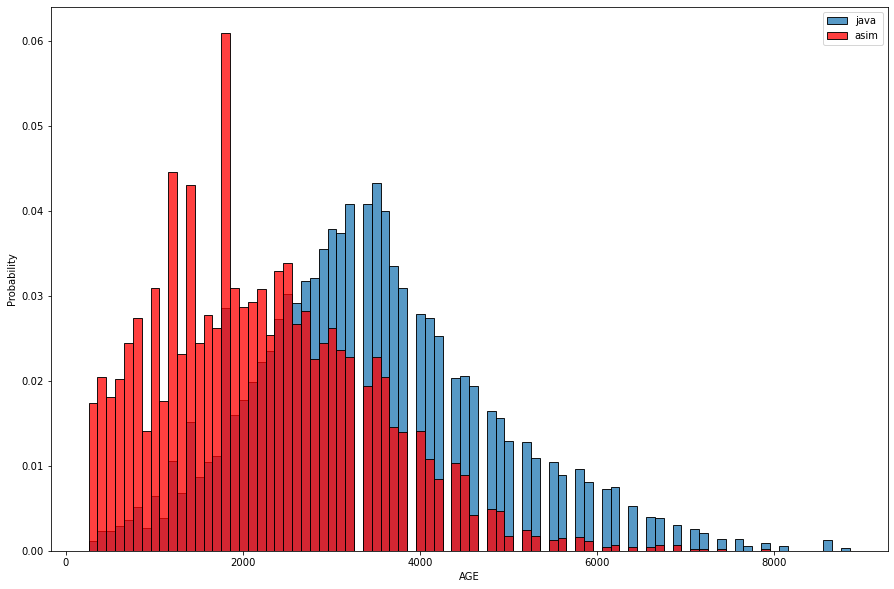

In [68]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_persons[old_persons.LD_INDICATOR_WORKRELATED == 1].AGE ** 2, ax=ax, label="java", stat="probability", binwidth = 100)
sns.histplot(asim_persons[asim_persons.ldt_tour_gen_person_WORKRELATED].age ** 2, ax=ax, label="asim", stat="probability", color="red", binwidth = 100)
ax.legend()

In [ ]:
# other trips

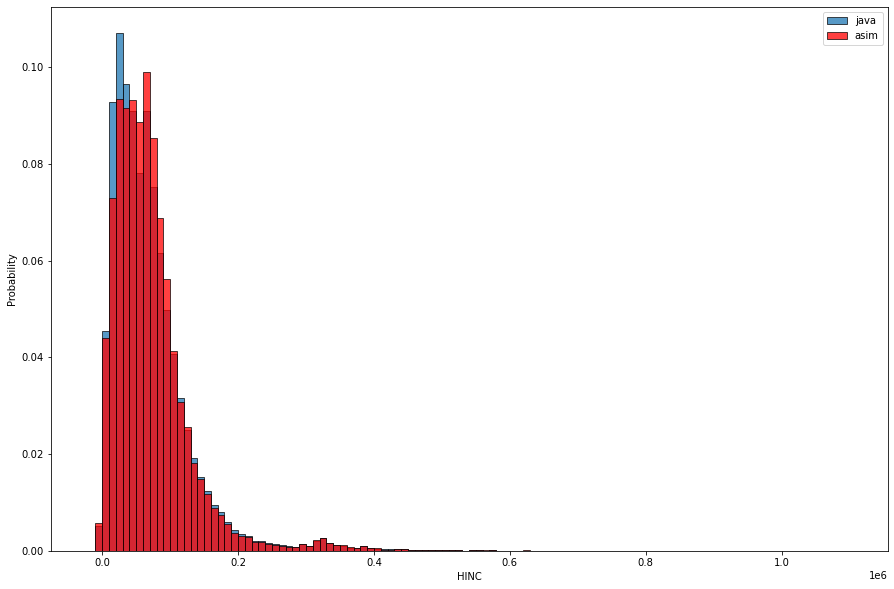

In [72]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_persons[old_persons.LD_INDICATOR_OTHER == 1].HH_ID].HINC, ax=ax, label="java", stat="probability", binwidth=10000)
sns.histplot(asim_hh.set_index("household_id").loc[asim_persons[asim_persons.ldt_tour_gen_person_OTHER].household_id].INCOME, ax=ax, label="asim", stat="probability", color="red", binwidth=10000)
ax.legend()

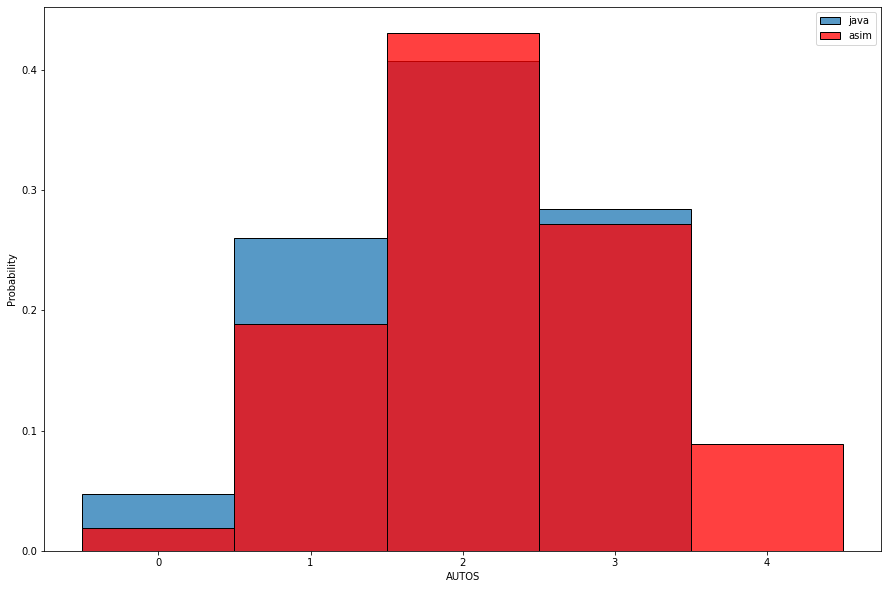

In [73]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_persons[old_persons.LD_INDICATOR_OTHER == 1].HH_ID].AUTOS, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_hh.set_index("household_id").loc[asim_persons[asim_persons.ldt_tour_gen_person_OTHER].household_id].auto_ownership, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

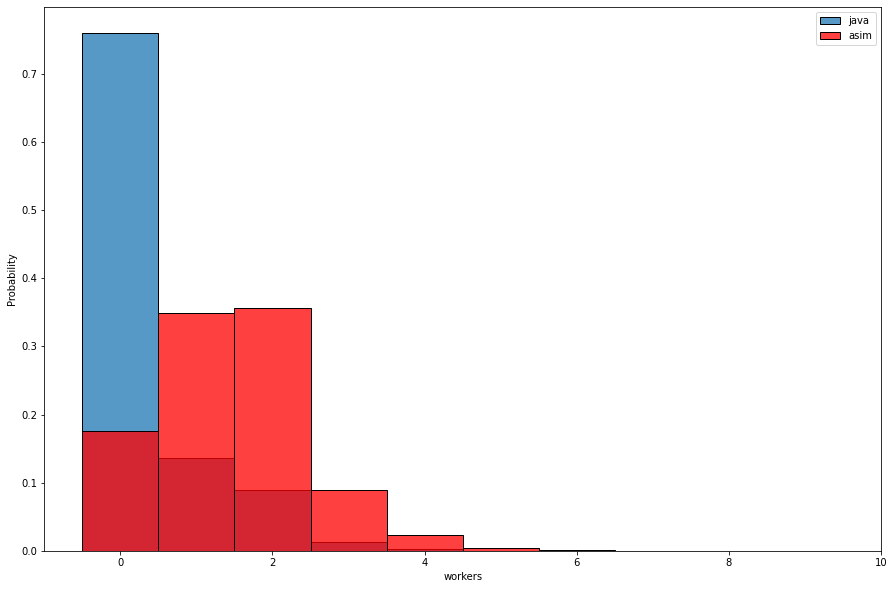

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_persons[old_persons.LD_INDICATOR_OTHER == 1].HH_ID].workers, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_hh.set_index("household_id").loc[asim_persons[asim_persons.ldt_tour_gen_person_OTHER].household_id].num_workers, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()
# try consistent unemp def (esr vs occup)

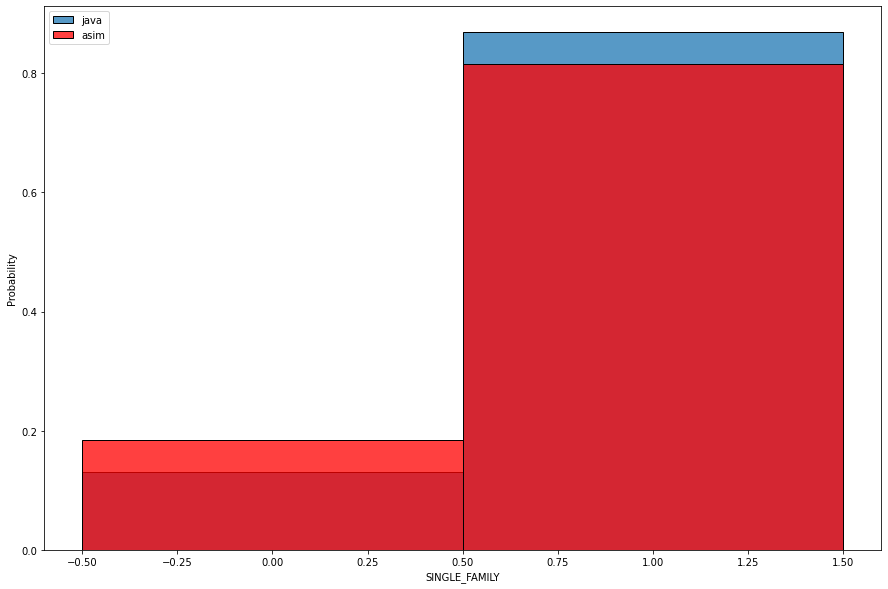

In [75]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_persons[old_persons.LD_INDICATOR_OTHER == 1].HH_ID].SINGLE_FAMILY, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_hh.set_index("household_id").loc[asim_persons[asim_persons.ldt_tour_gen_person_OTHER].household_id].BLD.isin([2, 3]).astype(int), ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

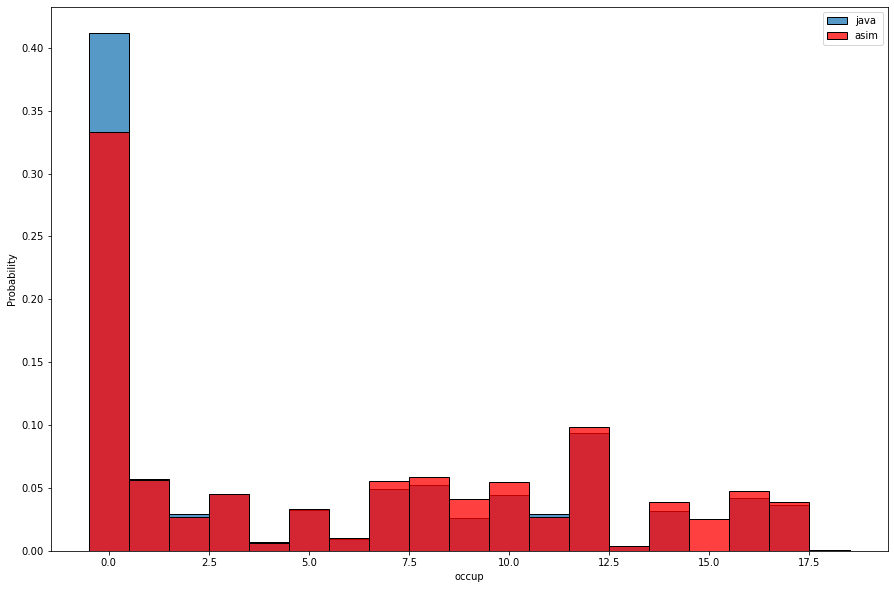

In [76]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_persons[old_persons.LD_INDICATOR_OTHER == 1].occup, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_persons[asim_persons.ldt_tour_gen_person_OTHER].SW_OCCUP, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

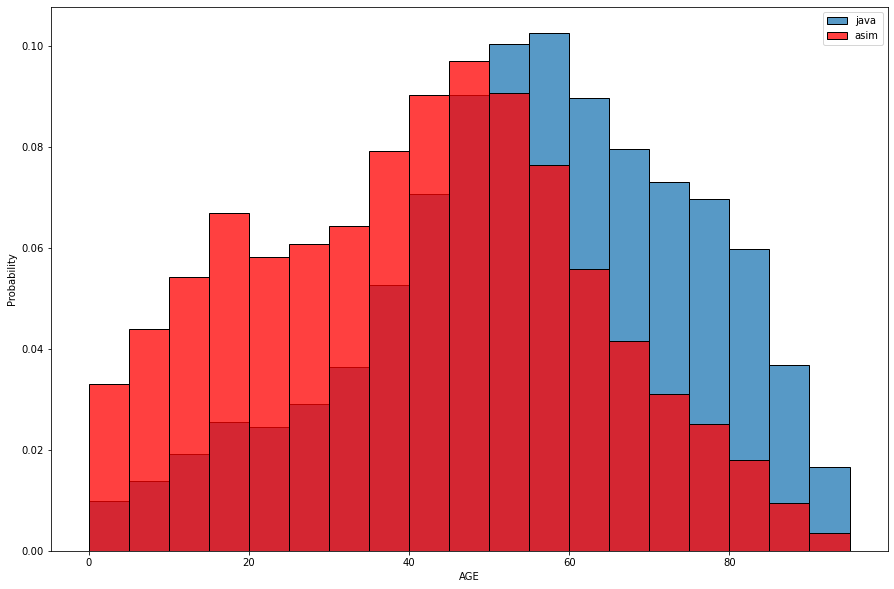

In [42]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_persons[old_persons.LD_INDICATOR_OTHER == 1].AGE, ax=ax, label="java", stat="probability", binwidth = 5)
sns.histplot(asim_persons[asim_persons.ldt_tour_gen_person_OTHER].age, ax=ax, label="asim", stat="probability", color="red", binwidth = 5)
ax.legend()

<AxesSubplot:xlabel='age', ylabel='Probability'>

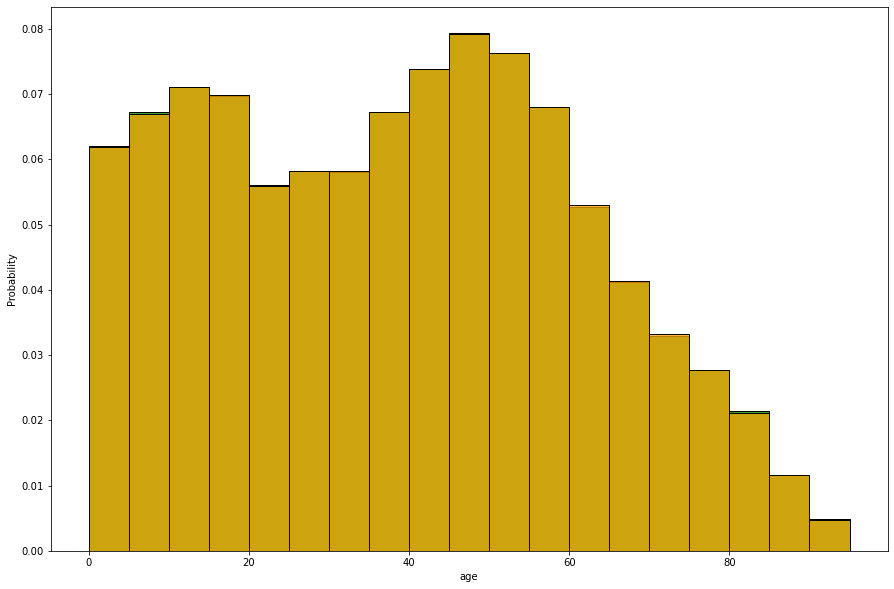

In [41]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(asim_persons.age, ax=ax, label="total", stat="probability", color="green", binwidth=5)
sns.histplot(old_persons.AGE, ax=ax, label="total_java", stat="probability", binwidth=5, color="orange")

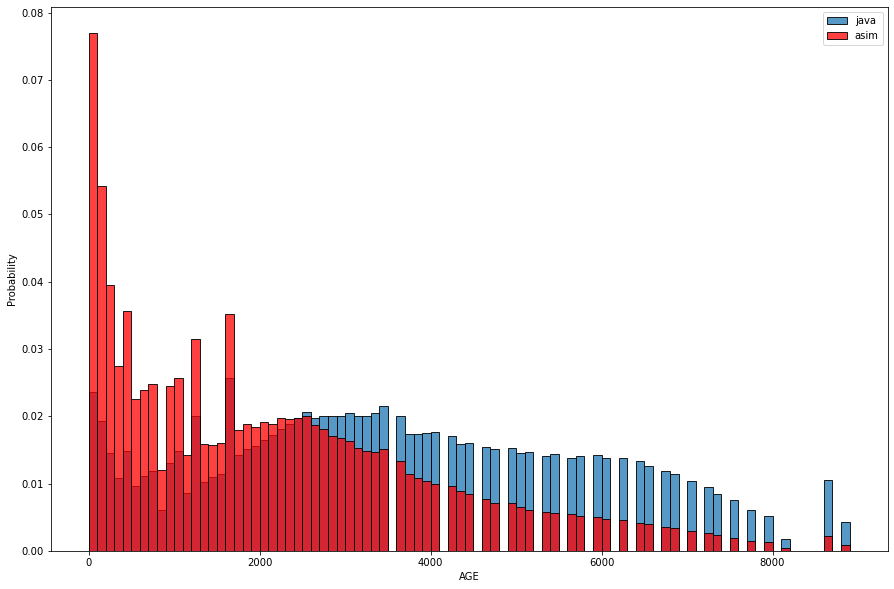

In [80]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_persons[old_persons.LD_INDICATOR_OTHER == 1].AGE ** 2, ax=ax, label="java", stat="probability", binwidth = 100)
sns.histplot(asim_persons[asim_persons.ldt_tour_gen_person_OTHER].age ** 2, ax=ax, label="asim", stat="probability", color="red", binwidth = 100)
ax.legend()

In [ ]:
# internal external household

In [87]:
asim_hh.set_index("household_id").loc[asim_results[asim_results.tour_type == "longdist_household"].household_id].INCOME

household_id
1726858     39000
3837995    108530
5184459    100000
3252113     40000
5423479      7400
            ...  
588719      26000
4729328     40000
2663509    103410
675400      46200
1096610     93000
Name: INCOME, Length: 1503, dtype: int64

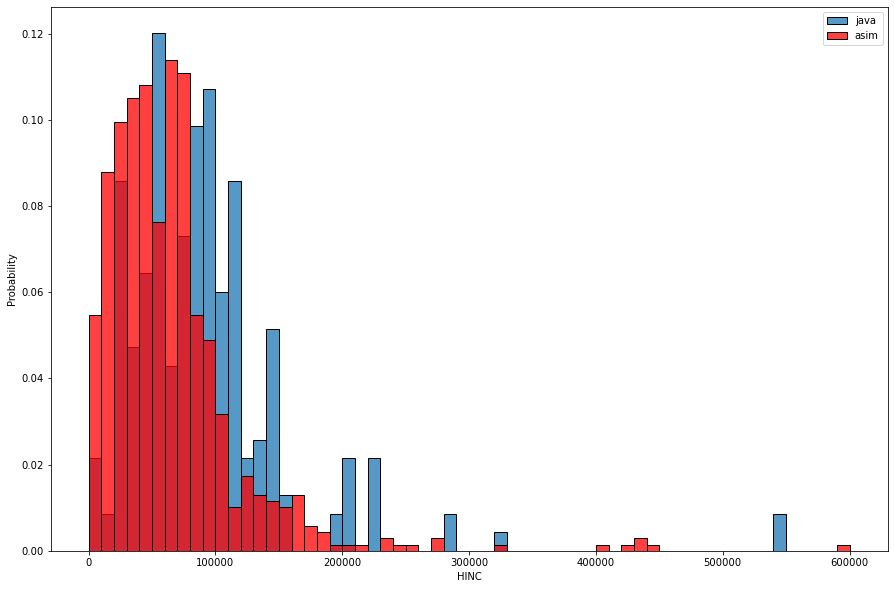

In [112]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_results[(old_results.tourPurpose == "HOUSEHOLD") & (old_results.destinationType == "EXTERNAL")].hhID].HINC, ax=ax, label="java", stat="probability", binwidth = 10000)
sns.histplot(asim_hh.set_index("household_id").loc[asim_results[(asim_results.tour_type == "longdist_household") & (asim_results.internal_external == 1)].household_id].INCOME, ax=ax, label="asim", stat="probability", color="red", binwidth = 10000)
ax.legend()

In [114]:
# merging bitshifted patterns
asim_results["ldt_pattern"] = np.where(asim_results["ldt_pattern"].isin([8, 16]), 0, asim_results["ldt_pattern"])
asim_results["ldt_pattern"] = np.where(asim_results["ldt_pattern"].isin([9, 17]), 1, asim_results["ldt_pattern"])
asim_results["ldt_pattern"] = np.where(asim_results["ldt_pattern"].isin([10, 18]), 2, asim_results["ldt_pattern"])
asim_results["ldt_pattern"] = np.where(asim_results["ldt_pattern"].isin([11, 19]), 3, asim_results["ldt_pattern"])
asim_results["ldt_pattern"] = np.where(asim_results["ldt_pattern"].isin([12, 20]), 4, asim_results["ldt_pattern"])

In [117]:
old_results["pattern"] = 0
old_results["pattern"] = np.where(old_results["patternType"] == "BEGIN_TOUR", 1, old_results["pattern"])
old_results["pattern"] = np.where(old_results["patternType"] == "END_TOUR", 2, old_results["pattern"])
old_results["pattern"] = np.where(old_results["patternType"] == "COMPLETE_TOUR", 3, old_results["pattern"])

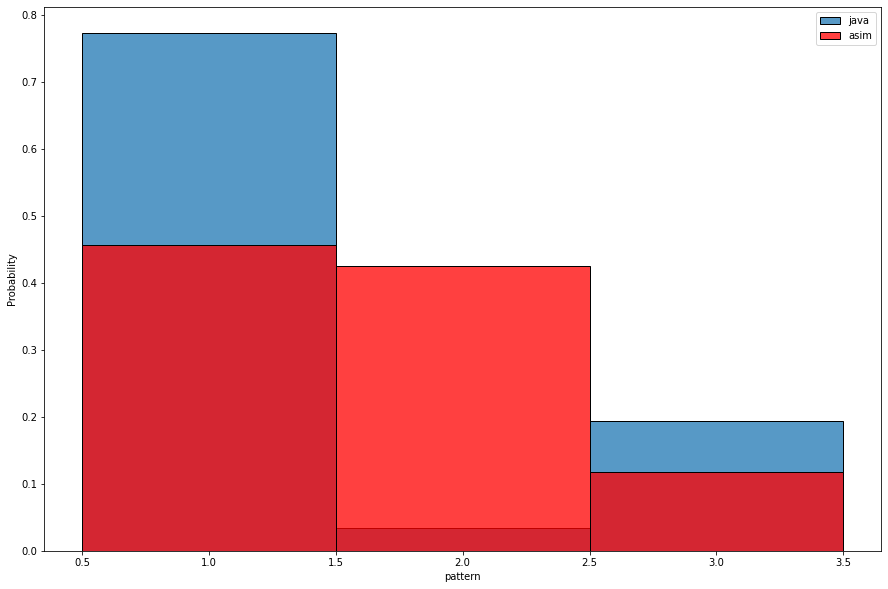

In [119]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_results[(old_results.tourPurpose == "HOUSEHOLD") & (old_results.destinationType == "EXTERNAL")].pattern, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_results[(asim_results.tour_type == "longdist_household") & (asim_results.internal_external == 1)].ldt_pattern, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

In [ ]:
# internal external workrelated

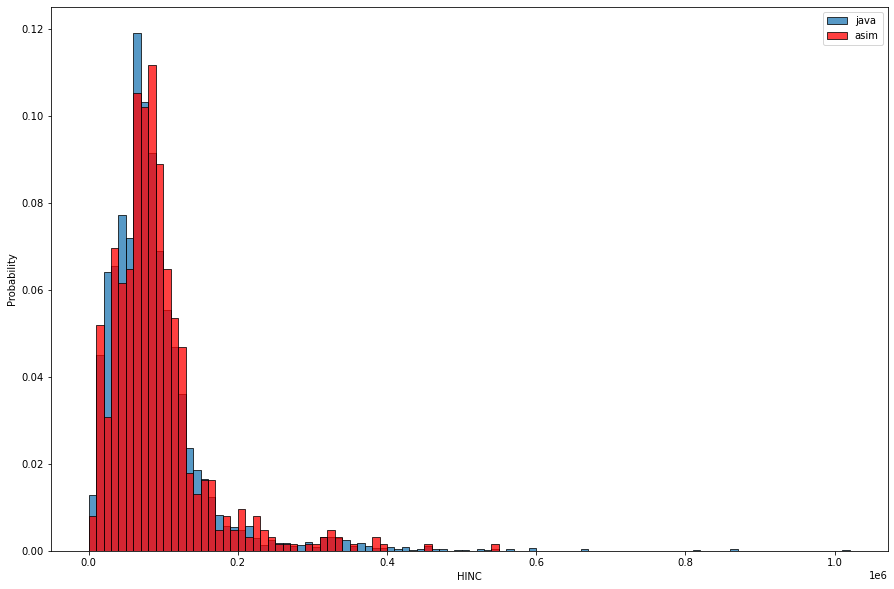

In [121]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_hh.set_index("HH_ID").loc[old_results[(old_results.tourPurpose == "WORKRELATED") & (old_results.destinationType == "EXTERNAL")].hhID].HINC, ax=ax, label="java", stat="probability", binwidth = 10000)
sns.histplot(asim_hh.set_index("household_id").loc[asim_results[(asim_results.tour_type == "longdist_person_WORKRELATED") & (asim_results.internal_external == 1)].household_id].INCOME, ax=ax, label="asim", stat="probability", color="red", binwidth = 10000)
ax.legend()

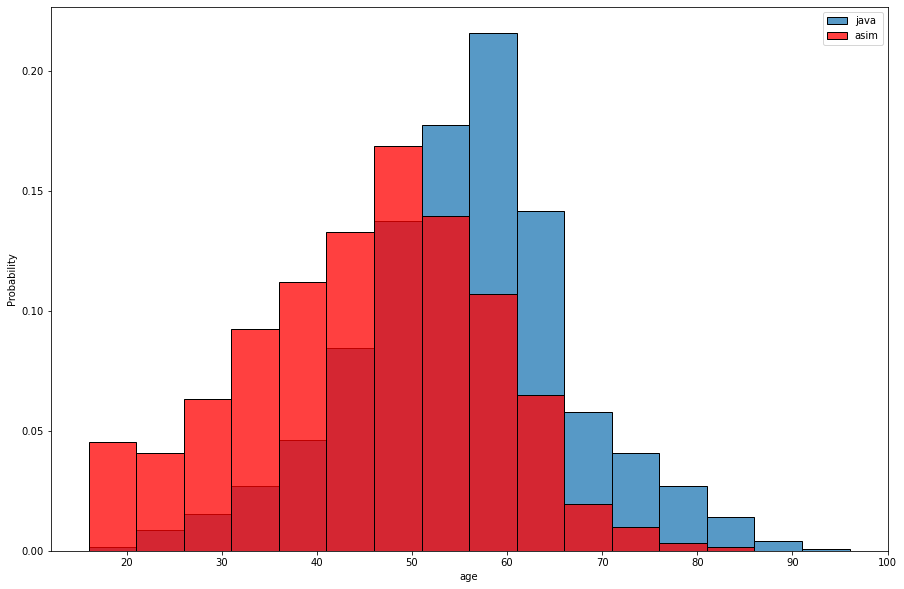

In [131]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_persons.set_index(["HH_ID", "memberID"]).loc[zip(old_results[(old_results.tourPurpose == "WORKRELATED") & (old_results.destinationType == "EXTERNAL")]["hhID"], old_results[(old_results.tourPurpose == "WORKRELATED") & (old_results.destinationType == "EXTERNAL")]["memberID"])].AGE.values, ax=ax, label="java", stat="probability", binwidth = 5)
sns.histplot(asim_persons.set_index("person_id").loc[asim_results[(asim_results.tour_type == "longdist_person_WORKRELATED") & (asim_results.internal_external == 1)].person_id].age, ax=ax, label="asim", stat="probability", color="red", binwidth = 5)
ax.legend()

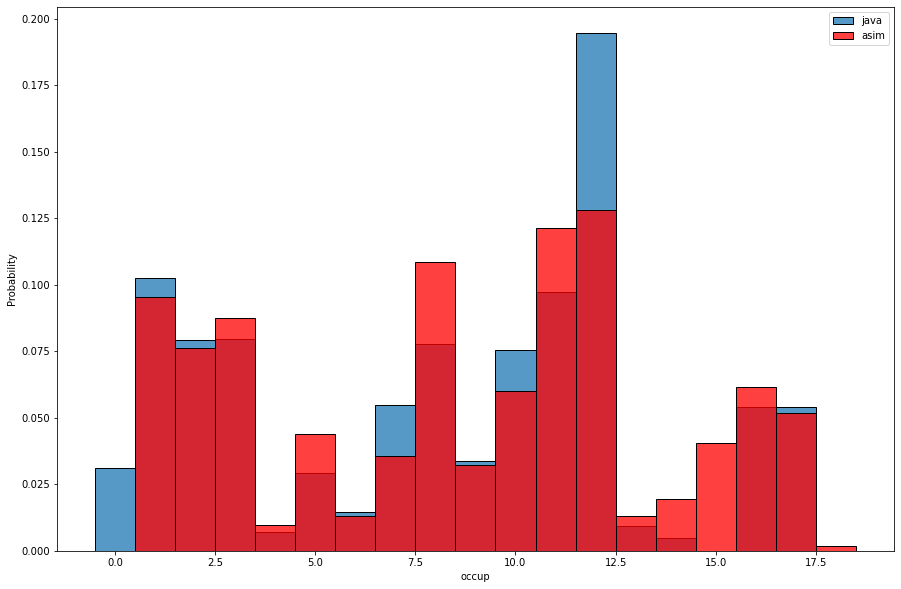

In [134]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_persons.set_index(["HH_ID", "memberID"]).loc[zip(old_results[(old_results.tourPurpose == "WORKRELATED") & (old_results.destinationType == "EXTERNAL")]["hhID"], old_results[(old_results.tourPurpose == "WORKRELATED") & (old_results.destinationType == "EXTERNAL")]["memberID"])].occup, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_persons.set_index("person_id").loc[asim_results[(asim_results.tour_type == "longdist_person_WORKRELATED") & (asim_results.internal_external == 1)].person_id].SW_OCCUP, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

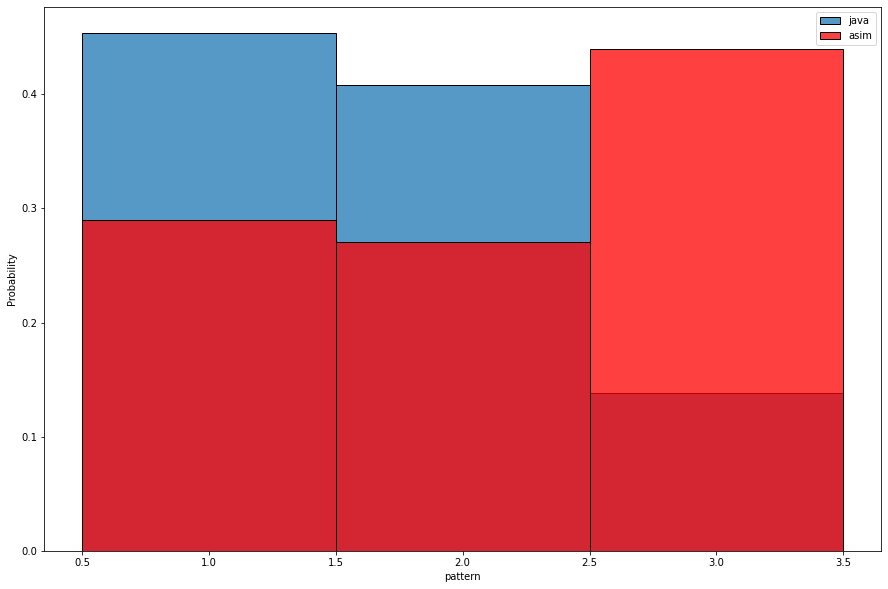

In [135]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(old_results[(old_results.tourPurpose == "WORKRELATED") & (old_results.destinationType == "EXTERNAL")].pattern, ax=ax, label="java", stat="probability", discrete=True)
sns.histplot(asim_results[(asim_results.tour_type == "longdist_person_WORKRELATED") & (asim_results.internal_external == 1)].ldt_pattern, ax=ax, label="asim", stat="probability", color="red", discrete=True)
ax.legend()

In [ ]:
# 